<a href="https://colab.research.google.com/github/sai14karthik/DIP/blob/main/AP21110010310_DIP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# N. Sai Karthik AP21110010310 CSE-E

# Step 1: Image Acquisition

In [33]:
image = cv2.imread('/content/Lenna_(test_image).png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Image Preprocessing
## Noise Reduction using Gaussian Blur

In [34]:
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)


## Image Enhancement using Histogram Equalization


In [35]:
equalized_image = cv2.equalizeHist(blurred_image)


# Step 3: Image Segmentation
## Thresholding

In [36]:
_, binary_image = cv2.threshold(equalized_image, 127, 255, cv2.THRESH_BINARY)


## Edge Detection using Canny Edge Detector


In [37]:
edges = cv2.Canny(binary_image, 100, 200)


# Step 4: Feature Extraction
## Using contours to extract features

In [38]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

# Step 5: Image Representation and Description
## For simplicity, representing and describing one contour

In [39]:
if contours:
    cnt = contours[0]
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print(f'Contour Area: {area}')
    print(f'Contour Perimeter: {perimeter}')

Contour Area: 0.0
Contour Perimeter: 2.0


# Step 6: Image Recognition (simple shape detection)
## Approximate contour to a polygon and detect shapes


In [40]:
epsilon = 0.02 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)


In [41]:
if len(approx) == 3:
    shape = "Triangle"
elif len(approx) == 4:
    shape = "Rectangle" if cv2.isContourConvex(approx) else "Quadrilateral"
elif len(approx) > 4:
    shape = "Circle"
else:
    shape = "Unknown"
print(f'Detected Shape: {shape}')


Detected Shape: Unknown


# Step 7: Image Interpretation
## Display all images

In [42]:
titles = ['Original Image', 'Gray Image', 'Blurred Image', 'Equalized Image',
          'Binary Image', 'Edges', 'Contours']

In [43]:
images = [image, gray_image, blurred_image, equalized_image,
          binary_image, edges, contour_image]

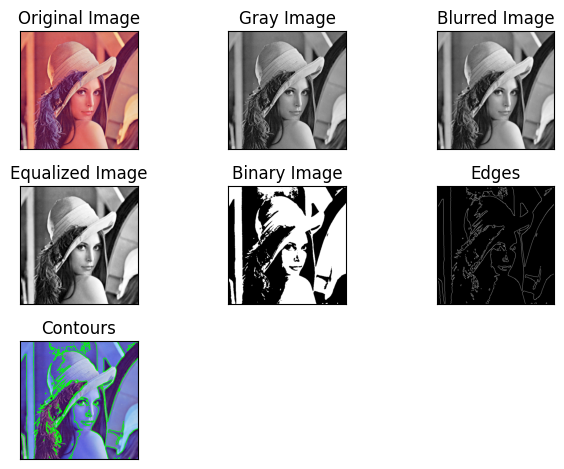

In [44]:
for i in range(7):
    plt.subplot(3, 3, i + 1)

    if titles[i] == 'Original Image':
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(images[i], 'gray')

    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.subplot(3, 3, 8)
plt.axis('off')

plt.tight_layout()
plt.show()
